In [2]:
from sqlalchemy import create_engine
import psycopg2
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pickle

In [3]:
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, confusion_matrix, precision_recall_curve, average_precision_score
from sklearn.preprocessing import scale, MinMaxScaler, normalize, StandardScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

In [4]:
#hotel-level predictors, with rooms and price variables scaled
Xn_df = pd.read_pickle('Xn_df.pickle')

In [5]:
#same as Xn_df, but with hotel_name, top_30 and rank_num columns added, and with none of the predictors scaled
XY_df = pd.read_pickle('XY_df.pickle')

In [6]:
XY_df.describe().T

,count,mean,std,min,25%,50%,75%,max
top30,440.0,0.068182,0.252345,0.0,0.00,0.0,0.00,1.0
rank_num,440.0,220.500000,127.161315,1.0,110.75,220.5,330.25,440.0
rooms_num,440.0,227.307610,250.577024,4.0,89.00,160.0,261.00,1957.0
prange_low,440.0,244.164050,113.659115,58.0,187.00,217.0,267.25,869.0
prange_high,440.0,514.266779,283.934119,109.0,385.00,458.0,553.00,3154.0
amen_wifi,440.0,0.804545,0.397002,0.0,1.00,1.0,1.00,1.0
amen_room_service,440.0,0.484091,0.500316,0.0,0.00,0.0,1.00,1.0
amen_restaurant,440.0,0.529545,0.499694,0.0,0.00,1.0,1.00,1.0
amen_bar_lounge,440.0,0.593182,0.491800,0.0,0.00,1.0,1.00,1.0
amen_gym,440.0,0.677273,0.468052,0.0,0.00,1.0,1.00,1.0


In [7]:
data_summary = XY_df.describe().T

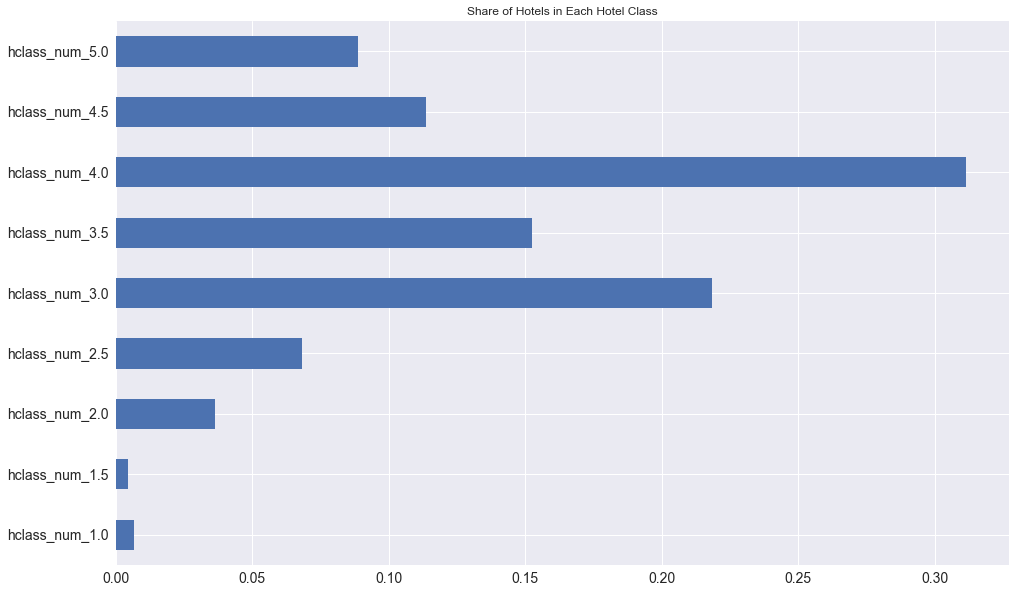

In [8]:
title = 'Share of Hotels in Each Hotel Class'
data_summary[data_summary.index.str.contains('hclass_')]['mean'].plot(kind='barh', title=title, figsize=(16,10), fontsize=14);

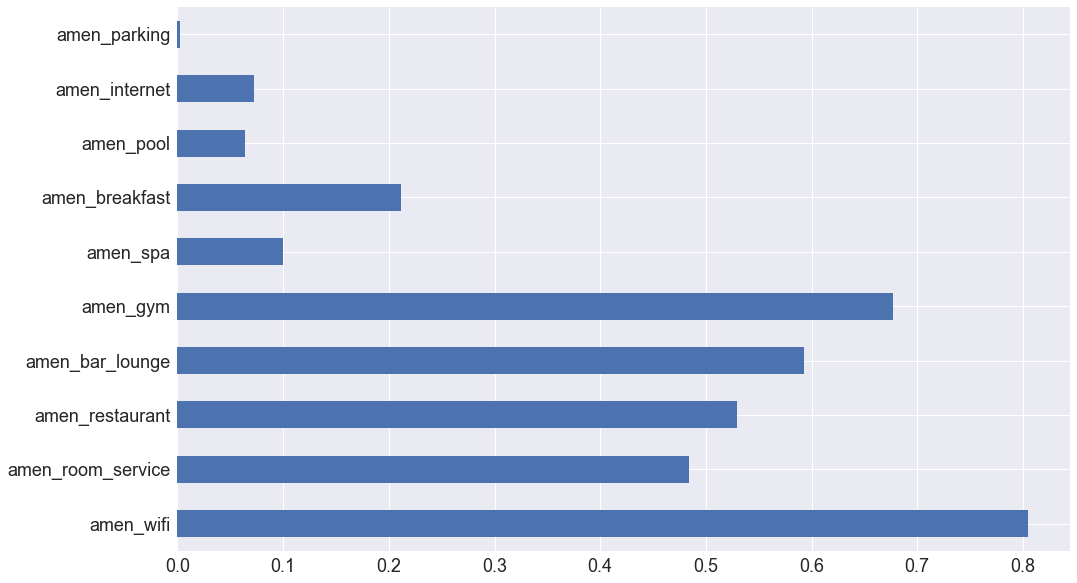

In [9]:
title = 'Share of Hotels with Each Type of Amenity'
data_summary[data_summary.index.str.contains('amen_')]['mean'].plot(kind='barh', figsize=(16,10), fontsize=18);

In [10]:
zip_code_shares = pd.DataFrame(data_summary[data_summary.index.str.contains('zip_5')]['mean'])

In [11]:
zip_code_shares.head()

,mean
zip_5_10001,0.106818
zip_5_10002,0.052273
zip_5_10003,0.020455
zip_5_10004,0.009091
zip_5_10005,0.011364


In [12]:
zip_code_shares.reset_index(inplace=True)
zip_code_shares.head()

,index,mean
0,zip_5_10001,0.106818
1,zip_5_10002,0.052273
2,zip_5_10003,0.020455
3,zip_5_10004,0.009091
4,zip_5_10005,0.011364


In [13]:
zip_code_shares['index'] = zip_code_shares['index'].apply(lambda x: x.replace('zip_5_',''))

In [14]:
zip_code_shares.rename(columns={'index': 'zip_code'},inplace=True)
zip_code_shares.head()

,zip_code,mean
0,10001,0.106818
1,10002,0.052273
2,10003,0.020455
3,10004,0.009091
4,10005,0.011364


In [15]:
zip_code_shares.to_csv('zip_code_shares.csv')

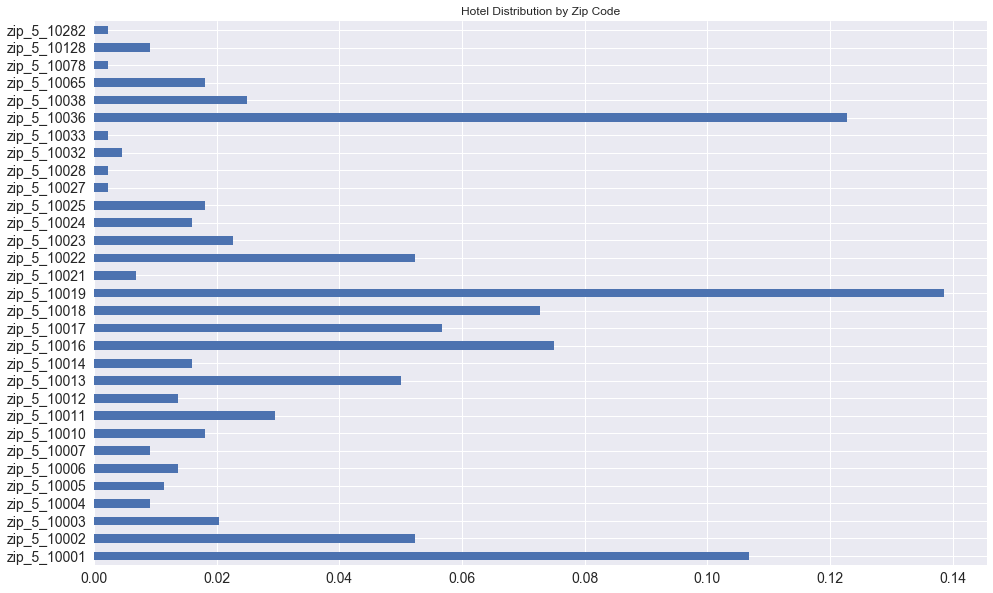

In [16]:
title = 'Hotel Distribution by Zip Code'
data_summary[data_summary.index.str.contains('zip_5')]['mean'].plot(kind='barh', title=title, figsize=(16,10), fontsize=14);

In [17]:
hclass_shares = pd.DataFrame(data_summary[data_summary.index.str.contains('hclass_')]['mean'])

In [18]:
hclass_shares.head()

,mean
hclass_num_1.0,0.006818
hclass_num_1.5,0.004545
hclass_num_2.0,0.036364
hclass_num_2.5,0.068182
hclass_num_3.0,0.218182


In [19]:
hclass_shares.reset_index(inplace=True)
hclass_shares.head()

,index,mean
0,hclass_num_1.0,0.006818
1,hclass_num_1.5,0.004545
2,hclass_num_2.0,0.036364
3,hclass_num_2.5,0.068182
4,hclass_num_3.0,0.218182


In [20]:
hclass_shares['index'] = hclass_shares['index'].apply(lambda x: x.replace("hclass_num_","Number of Stars: "))

In [21]:
hclass_shares.head()

,index,mean
0,Number of Stars: 1.0,0.006818
1,Number of Stars: 1.5,0.004545
2,Number of Stars: 2.0,0.036364
3,Number of Stars: 2.5,0.068182
4,Number of Stars: 3.0,0.218182


In [22]:
hclass_shares.set_index('index',inplace=True)

In [23]:
hclass_shares

,mean
index,
Number of Stars: 1.0,0.006818
Number of Stars: 1.5,0.004545
Number of Stars: 2.0,0.036364
Number of Stars: 2.5,0.068182
Number of Stars: 3.0,0.218182
Number of Stars: 3.5,0.152273
Number of Stars: 4.0,0.311364
Number of Stars: 4.5,0.113636
Number of Stars: 5.0,0.088636


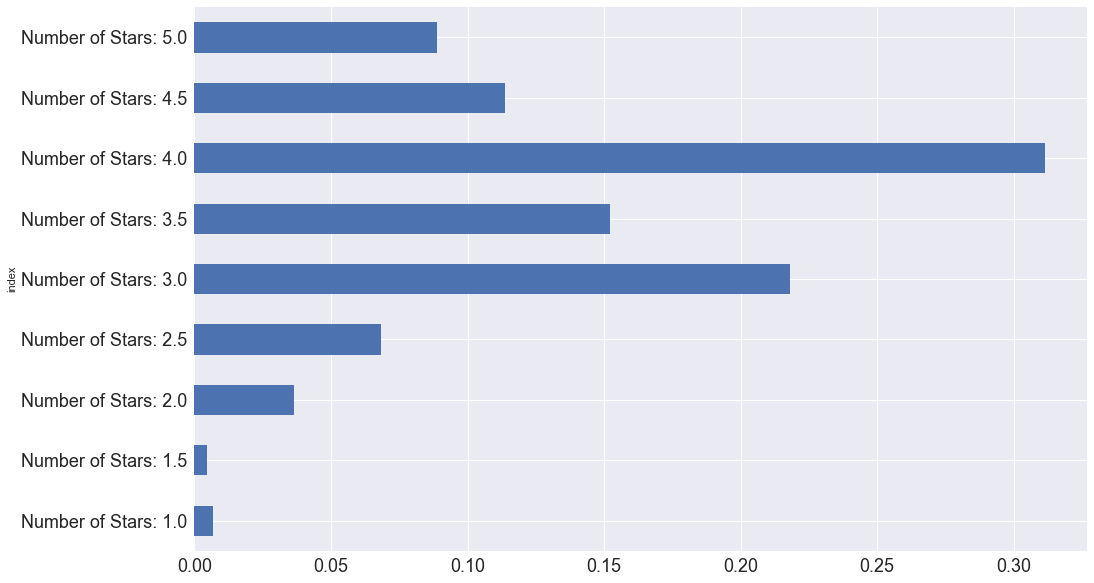

In [24]:
hclass_shares.plot(kind='barh', figsize=(16,10), fontsize=18, legend=False);

In [25]:
amen_shares = pd.DataFrame(data_summary[data_summary.index.str.contains('amen_')]['mean'])

In [26]:
amen_shares.head()

,mean
amen_wifi,0.804545
amen_room_service,0.484091
amen_restaurant,0.529545
amen_bar_lounge,0.593182
amen_gym,0.677273


In [27]:
amen_shares.reset_index(inplace=True)
amen_shares.head()

,index,mean
0,amen_wifi,0.804545
1,amen_room_service,0.484091
2,amen_restaurant,0.529545
3,amen_bar_lounge,0.593182
4,amen_gym,0.677273


In [28]:
def amen_values(orig_val):
    if orig_val == 'amen_wifi':
        new_val = "WiFi"
    elif orig_val == 'amen_room_service':
        new_val = "Room Service"
    elif orig_val == 'amen_restaurant':
        new_val = "Restaurant"
    elif orig_val == 'amen_bar_lounge':
        new_val = "Bar/Lounge"
    elif orig_val == 'amen_gym':
        new_val = "Gym"
    elif orig_val == 'amen_spa':
        new_val = "Spa"
    elif orig_val == 'amen_internet':
        new_val = "Internet"
    elif orig_val == 'amen_parking':
        new_val = "Parking"
    elif orig_val == 'amen_pool':
        new_val = "Pool"
    elif orig_val == 'amen_breakfast':
        new_val = "Breakfast"
    return new_val

In [29]:
amen_shares['index'] = amen_shares['index'].apply(lambda x: amen_values(x))

In [30]:
amen_shares.head()

,index,mean
0,WiFi,0.804545
1,Room Service,0.484091
2,Restaurant,0.529545
3,Bar/Lounge,0.593182
4,Gym,0.677273


In [31]:
amen_shares.set_index('index',inplace=True)

In [32]:
amen_shares

,mean
index,
WiFi,0.804545
Room Service,0.484091
Restaurant,0.529545
Bar/Lounge,0.593182
Gym,0.677273
Spa,0.100000
Breakfast,0.211364
Pool,0.063636
Internet,0.072727


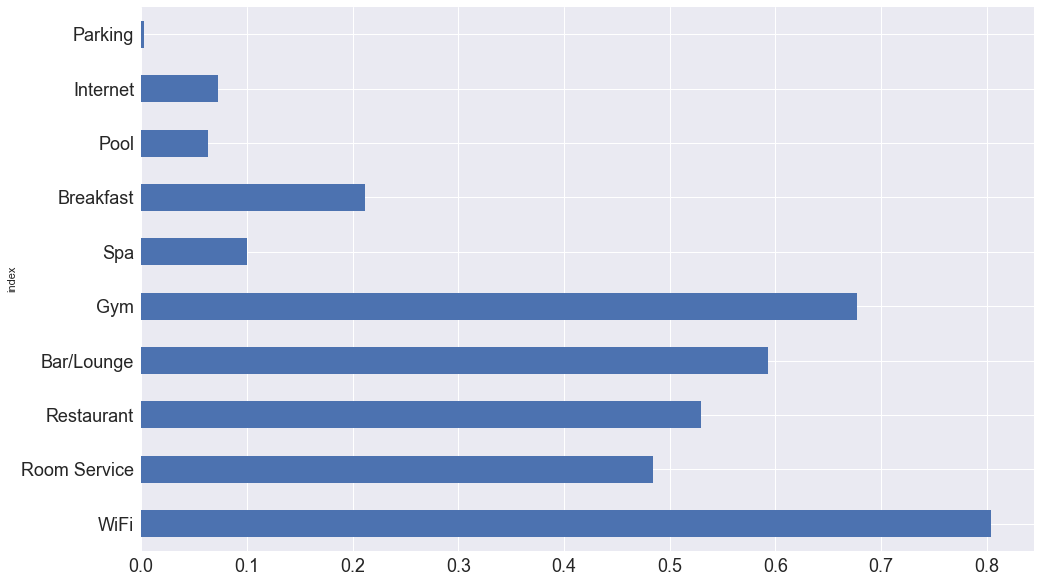

In [33]:
amen_shares.plot(kind='barh', figsize=(16,10), fontsize=18, legend=False);

In [34]:
#target column
y = XY_df.top30

In [35]:
print Xn_df.shape, XY_df.shape, y.shape

(440, 53) (440, 56) (440,)


In [36]:
# standardize X with StandardScaler, including dummy variables
ss = StandardScaler()
X_df = XY_df.drop(['hotel_name','top30','rank_num'],axis=1)
Xn = ss.fit_transform(X_df)
Xn_df = pd.DataFrame(Xn, columns=X_df.columns)

In [37]:
#StandardScaler
Xn_df.head()

,rooms_num,prange_low,prange_high,amen_wifi,amen_room_service,amen_restaurant,amen_bar_lounge,amen_gym,amen_spa,amen_breakfast,...,zip_5_10282,hclass_num_1.0,hclass_num_1.5,hclass_num_2.0,hclass_num_2.5,hclass_num_3.0,hclass_num_3.5,hclass_num_4.0,hclass_num_4.5,hclass_num_5.0
0,0.006762,1.222902,0.827658,0.492887,1.032341,0.942556,0.828145,0.690297,-0.333333,-0.517698,...,-0.047727,-0.082855,-0.067574,-0.194257,-0.270501,-0.528271,-0.423822,-0.672417,-0.358057,3.206564
1,-0.025201,0.509434,4.642739,0.492887,1.032341,0.942556,0.828145,0.690297,-0.333333,-0.517698,...,-0.047727,-0.082855,-0.067574,-0.194257,-0.270501,-0.528271,-0.423822,-0.672417,-0.358057,3.206564
2,-0.800295,-0.441858,-0.628560,0.492887,-0.968672,0.942556,0.828145,-1.448652,-0.333333,-0.517698,...,-0.047727,-0.082855,-0.067574,-0.194257,-0.270501,-0.528271,2.359484,-0.672417,-0.358057,-0.311860
3,-0.756347,-0.547557,-0.603879,0.492887,-0.968672,-1.060945,-1.207518,-1.448652,-0.333333,-0.517698,...,-0.047727,-0.082855,-0.067574,-0.194257,-0.270501,1.892969,-0.423822,-0.672417,-0.358057,-0.311860
4,-0.820272,0.623941,-0.268913,0.492887,-0.968672,-1.060945,-1.207518,-1.448652,-0.333333,1.931627,...,-0.047727,-0.082855,-0.067574,-0.194257,-0.270501,1.892969,-0.423822,-0.672417,-0.358057,-0.311860


In [38]:
Xn_df.columns

Index([        u'rooms_num',        u'prange_low',       u'prange_high',
               u'amen_wifi', u'amen_room_service',   u'amen_restaurant',
         u'amen_bar_lounge',          u'amen_gym',          u'amen_spa',
          u'amen_breakfast',         u'amen_pool',     u'amen_internet',
            u'amen_parking',       u'zip_5_10001',       u'zip_5_10002',
             u'zip_5_10003',       u'zip_5_10004',       u'zip_5_10005',
             u'zip_5_10006',       u'zip_5_10007',       u'zip_5_10010',
             u'zip_5_10011',       u'zip_5_10012',       u'zip_5_10013',
             u'zip_5_10014',       u'zip_5_10016',       u'zip_5_10017',
             u'zip_5_10018',       u'zip_5_10019',       u'zip_5_10021',
             u'zip_5_10022',       u'zip_5_10023',       u'zip_5_10024',
             u'zip_5_10025',       u'zip_5_10027',       u'zip_5_10028',
             u'zip_5_10032',       u'zip_5_10033',       u'zip_5_10036',
             u'zip_5_10038',       u'zip_5_10065', 

In [39]:
Xn_df.shape

(440, 53)

In [40]:
XY_df[['hotel_name','rank_num','top30']].head(10)

,hotel_name,rank_num,top30
0,1 Hotel Central Park,30.0,1
1,11 Howard,34.0,0
2,3 West Club,374.0,0
3,36 Hudson Hotel,350.0,0
4,414 Hotel,1.0,1
5,6 Columbus - A SIXTY Hotel,294.0,0
6,A Hospitality Company Inc.,413.0,0
7,AKA Central Park,210.0,0
8,AKA Times Square,114.0,0
9,AKA Wall Street,338.0,0


In [41]:
class_cols = [col for col in list(XY_df) if col.startswith('hclass_num_')]
class_cols

['hclass_num_1.0',
 'hclass_num_1.5',
 'hclass_num_2.0',
 'hclass_num_2.5',
 'hclass_num_3.0',
 'hclass_num_3.5',
 'hclass_num_4.0',
 'hclass_num_4.5',
 'hclass_num_5.0']

In [42]:
XY_df[['hotel_name','rank_num','top30']+class_cols].to_csv('rank_class.csv')

#### MODELING

In [43]:
Xn_df.shape

(440, 53)

In [44]:
Xn_df.columns

Index([        u'rooms_num',        u'prange_low',       u'prange_high',
               u'amen_wifi', u'amen_room_service',   u'amen_restaurant',
         u'amen_bar_lounge',          u'amen_gym',          u'amen_spa',
          u'amen_breakfast',         u'amen_pool',     u'amen_internet',
            u'amen_parking',       u'zip_5_10001',       u'zip_5_10002',
             u'zip_5_10003',       u'zip_5_10004',       u'zip_5_10005',
             u'zip_5_10006',       u'zip_5_10007',       u'zip_5_10010',
             u'zip_5_10011',       u'zip_5_10012',       u'zip_5_10013',
             u'zip_5_10014',       u'zip_5_10016',       u'zip_5_10017',
             u'zip_5_10018',       u'zip_5_10019',       u'zip_5_10021',
             u'zip_5_10022',       u'zip_5_10023',       u'zip_5_10024',
             u'zip_5_10025',       u'zip_5_10027',       u'zip_5_10028',
             u'zip_5_10032',       u'zip_5_10033',       u'zip_5_10036',
             u'zip_5_10038',       u'zip_5_10065', 

In [45]:
XY_df.rank_num.describe()

count    440.000000
mean     220.500000
std      127.161315
min        1.000000
25%      110.750000
50%      220.500000
75%      330.250000
max      440.000000
Name: rank_num, dtype: float64

In [46]:
y_rank = XY_df.rank_num
y_rank.shape

(440,)

In [47]:
Xn_df_w_y = pd.concat([Xn_df,y_rank],axis=1)

In [48]:
Xn_df_w_y.columns

Index([        u'rooms_num',        u'prange_low',       u'prange_high',
               u'amen_wifi', u'amen_room_service',   u'amen_restaurant',
         u'amen_bar_lounge',          u'amen_gym',          u'amen_spa',
          u'amen_breakfast',         u'amen_pool',     u'amen_internet',
            u'amen_parking',       u'zip_5_10001',       u'zip_5_10002',
             u'zip_5_10003',       u'zip_5_10004',       u'zip_5_10005',
             u'zip_5_10006',       u'zip_5_10007',       u'zip_5_10010',
             u'zip_5_10011',       u'zip_5_10012',       u'zip_5_10013',
             u'zip_5_10014',       u'zip_5_10016',       u'zip_5_10017',
             u'zip_5_10018',       u'zip_5_10019',       u'zip_5_10021',
             u'zip_5_10022',       u'zip_5_10023',       u'zip_5_10024',
             u'zip_5_10025',       u'zip_5_10027',       u'zip_5_10028',
             u'zip_5_10032',       u'zip_5_10033',       u'zip_5_10036',
             u'zip_5_10038',       u'zip_5_10065', 

In [49]:
Xn_df_w_y_comb = pd.DataFrame()

In [50]:
Xn_df_w_y_cols = Xn_df_w_y.columns.tolist()

In [51]:
row = 0
for i in range(len(Xn_df_w_y.index)-1):
    for j in range(i+1,len(Xn_df_w_y.index)):
        for col in Xn_df_w_y_cols:
            Xn_df_w_y_comb.loc[row,col+'_1'] = Xn_df_w_y.loc[i,col]
            Xn_df_w_y_comb.loc[row,col+'_2'] = Xn_df_w_y.loc[j,col]
        row += 1

In [52]:
Xn_df_w_y_comb.shape

(96580, 108)

In [53]:
Xn_df_w_y_comb.head()

,rooms_num_1,rooms_num_2,prange_low_1,prange_low_2,prange_high_1,prange_high_2,amen_wifi_1,amen_wifi_2,amen_room_service_1,amen_room_service_2,...,hclass_num_3.5_1,hclass_num_3.5_2,hclass_num_4.0_1,hclass_num_4.0_2,hclass_num_4.5_1,hclass_num_4.5_2,hclass_num_5.0_1,hclass_num_5.0_2,rank_num_1,rank_num_2
0,0.006762,-0.025201,1.222902,0.509434,0.827658,4.642739,0.492887,0.492887,1.032341,1.032341,...,-0.423822,-0.423822,-0.672417,-0.672417,-0.358057,-0.358057,3.206564,3.206564,30.0,34.0
1,0.006762,-0.800295,1.222902,-0.441858,0.827658,-0.628560,0.492887,0.492887,1.032341,-0.968672,...,-0.423822,2.359484,-0.672417,-0.672417,-0.358057,-0.358057,3.206564,-0.311860,30.0,374.0
2,0.006762,-0.756347,1.222902,-0.547557,0.827658,-0.603879,0.492887,0.492887,1.032341,-0.968672,...,-0.423822,-0.423822,-0.672417,-0.672417,-0.358057,-0.358057,3.206564,-0.311860,30.0,350.0
3,0.006762,-0.820272,1.222902,0.623941,0.827658,-0.268913,0.492887,0.492887,1.032341,-0.968672,...,-0.423822,-0.423822,-0.672417,-0.672417,-0.358057,-0.358057,3.206564,-0.311860,30.0,1.0
4,0.006762,-0.556580,1.222902,0.033788,0.827658,-0.004467,0.492887,0.492887,1.032341,1.032341,...,-0.423822,-0.423822,-0.672417,-0.672417,-0.358057,2.792848,3.206564,-0.311860,30.0,294.0


In [54]:
Xn_df_w_y_comb['hotel_1_better'] = (Xn_df_w_y_comb.rank_num_1 < Xn_df_w_y_comb.rank_num_2)

In [55]:
Xn_df_w_y_comb.hotel_1_better.value_counts()

False    49088
True     47492
Name: hotel_1_better, dtype: int64

In [56]:
Xn_df_w_y_comb['hotel_1_better'] = Xn_df_w_y_comb.hotel_1_better.apply(lambda x: int(x))

In [57]:
Xn_df_w_y_comb.hotel_1_better.value_counts()

0    49088
1    47492
Name: hotel_1_better, dtype: int64

In [58]:
y_pair = Xn_df_w_y_comb.hotel_1_better

In [59]:
dropped_vars = Xn_df_w_y_comb[['rank_num_1','rank_num_2','hotel_1_better']]

In [60]:
Xn_df_w_y_comb.drop(['rank_num_1','rank_num_2','hotel_1_better'],axis=1,inplace=True)

In [61]:
Xn_df_w_y_comb.shape

(96580, 106)

In [62]:
X_train_p, X_test_p, Y_train_p, Y_test_p =  train_test_split(Xn_df_w_y_comb, y_pair, test_size = 0.33, random_state=1234)

In [63]:
X_train_p.head()

,rooms_num_1,rooms_num_2,prange_low_1,prange_low_2,prange_high_1,prange_high_2,amen_wifi_1,amen_wifi_2,amen_room_service_1,amen_room_service_2,...,hclass_num_3.0_1,hclass_num_3.0_2,hclass_num_3.5_1,hclass_num_3.5_2,hclass_num_4.0_1,hclass_num_4.0_2,hclass_num_4.5_1,hclass_num_4.5_2,hclass_num_5.0_1,hclass_num_5.0_2
87220,0.382323,0.006762,-0.221651,4.561230,-0.201920,3.017275,-2.028862,0.492887,1.032341,1.032341,...,-0.528271,-0.528271,-0.423822,-0.423822,1.487171,-0.672417,-0.358057,-0.358057,-0.31186,3.206564
15504,-0.368800,-0.364804,-0.177610,-0.371392,-0.230128,-0.078512,0.492887,-2.028862,1.032341,1.032341,...,1.892969,-0.528271,-0.423822,-0.423822,-0.672417,1.487171,-0.358057,-0.358057,-0.31186,-0.311860
59684,-0.684431,-0.137070,0.421351,-0.239268,-0.089089,-0.099667,0.492887,0.492887,1.032341,1.032341,...,-0.528271,-0.528271,-0.423822,-0.423822,-0.672417,1.487171,2.792848,-0.358057,-0.31186,-0.311860
77996,1.141436,-0.153052,-0.239268,2.033262,0.069578,1.314240,-2.028862,0.492887,-0.968672,1.032341,...,-0.528271,-0.528271,-0.423822,-0.423822,1.487171,-0.672417,-0.358057,-0.358057,-0.31186,3.206564
10907,-0.620505,-0.808286,-0.389008,-0.451493,-0.931792,-0.669573,0.492887,0.492887,-0.968672,-0.968672,...,1.892969,-0.528271,-0.423822,-0.423822,-0.672417,-0.672417,-0.358057,-0.358057,-0.31186,-0.311860


In [64]:
Y_train_p.head()

87220    0
15504    1
59684    0
77996    0
10907    1
Name: hotel_1_better, dtype: int64

In [65]:
dropped_vars.head()

,rank_num_1,rank_num_2,hotel_1_better
0,30.0,34.0,1
1,30.0,374.0,1
2,30.0,350.0,1
3,30.0,1.0,0
4,30.0,294.0,1


#### XGBoost Classifier

In [66]:
from xgboost import XGBClassifier

In [67]:
n_estimators = [50, 100, 150, 200]
max_depth = [2, 4, 6, 8]
learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
param_grid_xgb_cl = dict(max_depth=max_depth, n_estimators=n_estimators, learning_rate=learning_rate)

In [68]:
xgbc_gs_p = GridSearchCV(XGBClassifier(), param_grid_xgb_cl, cv=5, verbose=1)
xgbc_gs_p.fit(X_train_p, Y_train_p)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=1)]: Done 480 out of 480 | elapsed: 365.7min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, nthread=-1, objective='binary:logistic', seed=0,
       silent=True, subsample=1),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [50, 100, 150, 200], 'learning_rate': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3], 'max_depth': [2, 4, 6, 8]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [69]:
best_xgbc_p = xgbc_gs_p.best_estimator_
print xgbc_gs_p.best_params_
#Best score: average of CV fold scores of the best model
print xgbc_gs_p.best_score_

{'n_estimators': 200, 'learning_rate': 0.3, 'max_depth': 6}
0.962353959325


In [196]:
print "Baseline: ", 1. - Y_test_p.mean()

Baseline:  0.504361194779


In [72]:
print "Test set accuracy: ", xgbc_gs_p.score(X_test_p, Y_test_p)

Test set accuracy:  0.967243975904


In [73]:
xgbc_predictions_p = xgbc_gs_p.predict(X_test_p)

In [74]:
confusion_matrix(Y_test_p, xgbc_predictions_p)

array([[15567,   508],
       [  536, 15261]])

In [75]:
conmat = np.array(confusion_matrix(Y_test_p, xgbc_predictions_p, labels=[1,0]))
confusion = pd.DataFrame(conmat, index=['in_top_group', 'in_bottom_group'],
                            columns=['predicted_in_top','predicted_in_bottom'])
print(confusion)

                 predicted_in_top  predicted_in_bottom
in_top_group                15261                  536
in_bottom_group               508                15567


In [76]:
best_xgbc_p.fit(X_train_p,Y_train_p)

XGBClassifier(base_score=0.5, colsample_bytree=1, gamma=0, learning_rate=0.3,
       max_delta_step=0, max_depth=6, min_child_weight=1, missing=None,
       n_estimators=200, nthread=-1, objective='binary:logistic', seed=0,
       silent=True, subsample=1)

In [77]:
best_xgbc_p.score(X_train_p,Y_train_p)

0.99043394943438212

In [78]:
best_xgbc_p.score(X_test_p, Y_test_p)

0.96724397590361444

In [79]:
Y_pred_train_xgbc_p = best_xgbc_p.predict(X_train_p)

In [80]:
confusion_matrix(Y_train_p, Y_pred_train_xgbc_p)

array([[32722,   291],
       [  328, 31367]])

In [167]:
Y_pred_test_xgbc_p = best_xgbc_p.predict(X_test_p)

In [201]:
Y_pred_prob_test_xgbc_p = best_xgbc_p.predict_proba(X_test_p)[:, 1]

In [202]:
Y_pred_prob_test_xgbc_p.size

31872

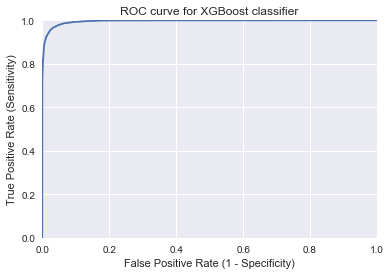

In [203]:
fpr, tpr, thresholds = roc_curve(Y_test_p, Y_pred_prob_test_xgbc_p)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for XGBoost classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [215]:
print classification_report(Y_test_p, Y_pred_test_xgbc_p)

             precision    recall  f1-score   support

          0       0.97      0.97      0.97     16075
          1       0.97      0.97      0.97     15797

avg / total       0.97      0.97      0.97     31872



In [132]:
Xn_df_w_y_comb.to_pickle('Xn_df_w_y_comb.pickle')

In [133]:
y_pair.to_pickle('y_pair.pickle')

In [134]:
dropped_vars.to_pickle('dropped_vars.pickle')

In [135]:
Xn_df_w_y.to_pickle('Xn_df_w_y.pickle')

In [136]:
type(Y_train_p)

pandas.core.series.Series

In [137]:
print X_train_p.shape, X_test_p.shape, Y_train_p.size, Y_test_p.size, Y_pred_train_xgbc_p.size

(64708, 106) (31872, 106) 64708 31872 64708


In [138]:
dropped_vars.shape

(96580, 3)

In [139]:
X_train_p_with_dropped_vars = X_train_p.merge(dropped_vars,how='left',left_index=True,right_index=True)

In [140]:
X_train_p_with_dropped_vars.shape

(64708, 109)

In [141]:
X_train_p_with_dropped_vars = pd.concat([X_train_p_with_dropped_vars,Y_train_p.rename("Y_actual")],axis=1)

In [142]:
X_train_p_with_dropped_vars.shape

(64708, 110)

In [143]:
Y_pred_train_xgbc_p_series = pd.Series(Y_pred_train_xgbc_p,index=Y_train_p.index)
Y_pred_train_xgbc_p_series.shape

(64708,)

In [144]:
X_train_p_with_dropped_vars = pd.concat([X_train_p_with_dropped_vars,Y_pred_train_xgbc_p_series.rename("Y_predicted")],axis=1)

In [145]:
X_train_p_with_dropped_vars.shape

(64708, 111)

In [146]:
X_train_p_with_dropped_vars[['Y_actual','Y_predicted','rank_num_1','rank_num_2','hotel_1_better']].head()

,Y_actual,Y_predicted,rank_num_1,rank_num_2,hotel_1_better
87220,0,0,125.0,29.0,0
15504,1,1,52.0,163.0,1
59684,0,0,379.0,140.0,0
77996,0,0,197.0,14.0,0
10907,1,1,229.0,395.0,1


In [147]:
pd.crosstab(X_train_p_with_dropped_vars.Y_actual,X_train_p_with_dropped_vars.Y_predicted)

Y_predicted,0,1
Y_actual,,
0,32722,291
1,328,31367


In [148]:
pd.crosstab(X_train_p_with_dropped_vars.Y_actual,X_train_p_with_dropped_vars.hotel_1_better)

hotel_1_better,0,1
Y_actual,,
0,33013,0
1,0,31695


In [149]:
#for each actual rank, count number of times that hotel was predicted to be ranked higher than another hotel
#(when that hotel was in rank_num_1 column)
rank_col_1_cts = X_train_p_with_dropped_vars.groupby('rank_num_1')['Y_predicted'].sum()

In [150]:
#for each actual rank, count number of times that hotel was predicted to be ranked higher than another hotel
#(when that hotel was in rank_num_2 column)
rank_col_2_cts = X_train_p_with_dropped_vars[X_train_p_with_dropped_vars.Y_predicted == 0].groupby('rank_num_2')['Y_predicted'].size()

In [151]:
rank_col_1_cts.shape

(438,)

In [152]:
rank_col_2_cts.shape

(430,)

In [153]:
ranked_higher_df = pd.DataFrame(rank_col_1_cts)
ranked_higher_df.reset_index(inplace=True)
ranked_higher_df.rename(columns={'Y_predicted':'Col_1'},inplace=True)
ranked_higher_df.head()

,rank_num_1,Col_1
0,1.0,300
1,2.0,273
2,3.0,177
3,4.0,246
4,5.0,73


In [154]:
ranked_higher_df2 = pd.DataFrame(rank_col_2_cts)
ranked_higher_df2.reset_index(inplace=True)
ranked_higher_df2.rename(columns={0:'Col_2'},inplace=True)
ranked_higher_df2.head()

,rank_num_2,Col_2
0,1.0,4
1,2.0,28
2,3.0,120
3,4.0,49
4,5.0,218


In [155]:
ranked_higher_df = ranked_higher_df.merge(ranked_higher_df2,how='outer',left_on='rank_num_1',right_on='rank_num_2')

In [156]:
ranked_higher_df['total_higher_ct'] = ranked_higher_df[['Col_1','Col_2']].sum(axis=1)

In [157]:
ranked_higher_df.total_higher_ct.unique()

array([ 304.,  301.,  297.,  295.,  291.,  280.,  282.,  278.,  299.,
        275.,  287.,  272.,  274.,  286.,  271.,  281.,  298.,  247.,
        276.,  292.,  267.,  279.,  265.,  283.,  255.,  264.,  249.,
        257.,  294.,  250.,  277.,  269.,  268.,  243.,  251.,  254.,
        256.,  263.,  260.,  241.,  227.,  244.,  237.,  231.,  242.,
        238.,  248.,  258.,  240.,  234.,  233.,  220.,  239.,  222.,
        229.,  225.,  232.,  221.,  218.,  223.,  228.,  216.,  215.,
        219.,  224.,  210.,  212.,  226.,  209.,  200.,  205.,  199.,
        197.,  217.,  198.,  206.,  201.,  214.,  204.,  213.,  208.,
        207.,  191.,  203.,  188.,  195.,  192.,  196.,  202.,  184.,
        190.,  186.,  193.,  176.,  189.,  182.,  173.,  185.,  175.,
        165.,  171.,  187.,  169.,  168.,  180.,  166.,  162.,  179.,
        174.,  159.,  154.,  151.,  149.,  160.,  158.,  150.,  161.,
        143.,  139.,  136.,  163.,  129.,  141.,  138.,  146.,  148.,
        152.,  130.,

In [158]:
ranked_higher_df['pred_rank'] = ranked_higher_df['total_higher_ct'].rank(ascending=False)

In [159]:
ranked_higher_df['orig_rank'] = ranked_higher_df.apply(lambda row: row['rank_num_1'] if row['rank_num_1'] != np.NaN else row['rank_num_2'], axis=1)

In [160]:
ranked_higher_df.orig_rank.unique()

array([   1.,    2.,    3.,    4.,    5.,    6.,    7.,    8.,    9.,
         10.,   11.,   12.,   13.,   14.,   15.,   16.,   17.,   18.,
         19.,   20.,   21.,   22.,   24.,   25.,   26.,   27.,   28.,
         29.,   30.,   31.,   32.,   33.,   34.,   35.,   36.,   37.,
         38.,   39.,   40.,   41.,   42.,   44.,   45.,   46.,   47.,
         48.,   49.,   50.,   51.,   52.,   53.,   54.,   55.,   56.,
         57.,   58.,   59.,   60.,   61.,   62.,   63.,   64.,   65.,
         66.,   67.,   68.,   69.,   70.,   71.,   72.,   73.,   74.,
         75.,   76.,   77.,   78.,   79.,   80.,   81.,   82.,   83.,
         84.,   85.,   86.,   87.,   88.,   89.,   90.,   91.,   92.,
         93.,   94.,   95.,   96.,   97.,   98.,   99.,  100.,  101.,
        102.,  103.,  104.,  105.,  106.,  107.,  108.,  109.,  110.,
        111.,  112.,  113.,  114.,  115.,  116.,  117.,  118.,  119.,
        120.,  121.,  122.,  123.,  124.,  125.,  126.,  127.,  128.,
        129.,  130.,

In [161]:
ranked_higher_df.head(30)

,rank_num_1,Col_1,rank_num_2,Col_2,total_higher_ct,pred_rank,orig_rank
0,1.0,300.0,1.0,4.0,304.0,1.0,1.0
1,2.0,273.0,2.0,28.0,301.0,2.0,2.0
2,3.0,177.0,3.0,120.0,297.0,6.0,3.0
3,4.0,246.0,4.0,49.0,295.0,8.0,4.0
4,5.0,73.0,5.0,218.0,291.0,12.0,5.0
5,6.0,139.0,6.0,141.0,280.0,22.0,6.0
6,7.0,24.0,7.0,258.0,282.0,19.0,7.0
7,8.0,65.0,8.0,213.0,278.0,25.0,8.0
8,9.0,184.0,9.0,111.0,295.0,8.0,9.0
9,10.0,34.0,10.0,265.0,299.0,3.5,10.0


In [162]:
from scipy.stats import spearmanr

In [163]:
ranked_higher_df.isnull().sum()

rank_num_1          2
Col_1               2
rank_num_2         10
Col_2              10
total_higher_ct     0
pred_rank           0
orig_rank           2
dtype: int64

In [164]:
spearmanr(ranked_higher_df[ranked_higher_df.orig_rank.notnull()].orig_rank,ranked_higher_df[ranked_higher_df.orig_rank.notnull()].pred_rank)

SpearmanrResult(correlation=0.99550445202914217, pvalue=0.0)

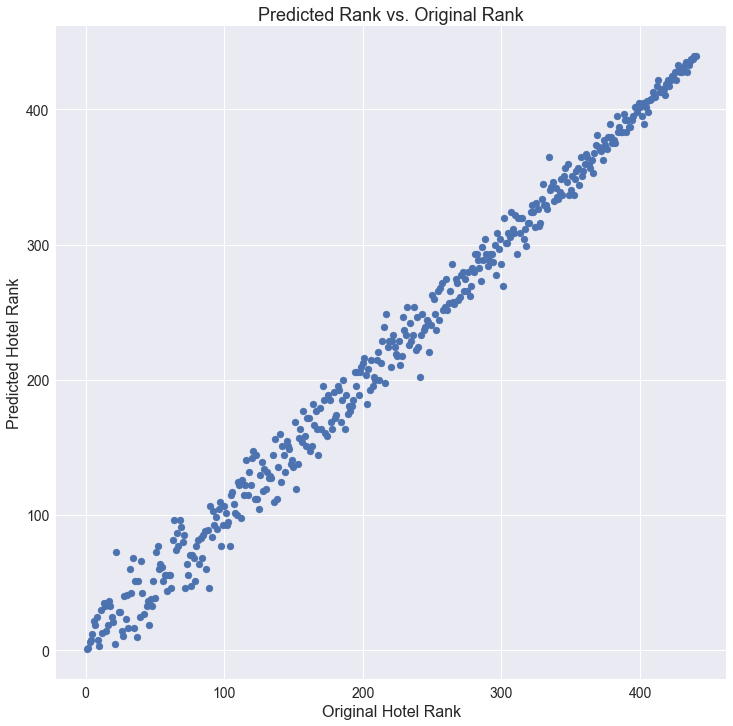

In [165]:
plt.figure(figsize = (12,12))
plt.scatter(ranked_higher_df.orig_rank, ranked_higher_df.pred_rank)
plt.title("Predicted Rank vs. Original Rank", fontsize=18)
plt.ylabel("Predicted Hotel Rank", fontsize=16)
plt.xlabel("Original Hotel Rank", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.xlim(0,20000)
#plt.ylim(0,500)
plt.show()

In [166]:
type(Y_test_p)

pandas.core.series.Series

In [168]:
X_test_p_with_dropped_vars = X_test_p.merge(dropped_vars,how='left',left_index=True,right_index=True)

In [169]:
X_test_p_with_dropped_vars.shape

(31872, 109)

In [170]:
X_test_p_with_dropped_vars = pd.concat([X_test_p_with_dropped_vars,Y_test_p.rename("Y_actual")],axis=1)

In [171]:
X_test_p_with_dropped_vars.shape

(31872, 110)

In [172]:
Y_pred_test_xgbc_p_series = pd.Series(Y_pred_test_xgbc_p,index=Y_test_p.index)
Y_pred_test_xgbc_p_series.shape

(31872,)

In [173]:
X_test_p_with_dropped_vars = pd.concat([X_test_p_with_dropped_vars,Y_pred_test_xgbc_p_series.rename("Y_predicted")],axis=1)

In [174]:
X_test_p_with_dropped_vars.shape

(31872, 111)

In [175]:
X_test_p_with_dropped_vars[['Y_actual','Y_predicted','rank_num_1','rank_num_2','hotel_1_better']].head()

,Y_actual,Y_predicted,rank_num_1,rank_num_2,hotel_1_better
79756,0,0,401.0,329.0,0
33822,0,0,386.0,231.0,0
75277,0,0,356.0,135.0,0
17331,1,1,2.0,274.0,1
11684,1,1,17.0,246.0,1


In [176]:
pd.crosstab(X_test_p_with_dropped_vars.Y_actual,X_test_p_with_dropped_vars.Y_predicted)

Y_predicted,0,1
Y_actual,,
0,15567,508
1,536,15261


In [177]:
pd.crosstab(X_test_p_with_dropped_vars.Y_actual,X_test_p_with_dropped_vars.hotel_1_better)

hotel_1_better,0,1
Y_actual,,
0,16075,0
1,0,15797


In [178]:
#for each actual rank, count number of times that hotel was predicted to be ranked higher than another hotel
#(when that hotel was in rank_num_1 column)
rank_col_1_cts_test = X_test_p_with_dropped_vars.groupby('rank_num_1')['Y_predicted'].sum()

In [179]:
#for each actual rank, count number of times that hotel was predicted to be ranked higher than another hotel
#(when that hotel was in rank_num_2 column)
rank_col_2_cts_test = X_test_p_with_dropped_vars[X_test_p_with_dropped_vars.Y_predicted == 0].groupby('rank_num_2')['Y_predicted'].size()

In [180]:
rank_col_1_cts_test.shape

(437,)

In [181]:
rank_col_2_cts_test.shape

(422,)

In [182]:
ranked_higher_df_test = pd.DataFrame(rank_col_1_cts_test)
ranked_higher_df_test.reset_index(inplace=True)
ranked_higher_df_test.rename(columns={'Y_predicted':'Col_1'},inplace=True)
ranked_higher_df_test.head()

,rank_num_1,Col_1
0,1.0,135
1,2.0,125
2,3.0,84
3,4.0,116
4,5.0,43


In [183]:
ranked_higher_df2_test = pd.DataFrame(rank_col_2_cts_test)
ranked_higher_df2_test.reset_index(inplace=True)
ranked_higher_df2_test.rename(columns={0:'Col_2'},inplace=True)
ranked_higher_df2_test.head()

,rank_num_2,Col_2
0,2.0,11
1,3.0,54
2,4.0,24
3,5.0,100
4,6.0,76


In [184]:
ranked_higher_df_test = ranked_higher_df_test.merge(ranked_higher_df2_test,how='outer',left_on='rank_num_1',right_on='rank_num_2')

In [185]:
ranked_higher_df_test['total_higher_ct'] = ranked_higher_df_test[['Col_1','Col_2']].sum(axis=1)

In [186]:
ranked_higher_df_test.total_higher_ct.unique()

array([ 135.,  136.,  138.,  140.,  143.,  154.,  149.,  155.,  131.,
        150.,  137.,  144.,  153.,  145.,  120.,  157.,  123.,  141.,
        125.,  122.,  139.,  133.,  148.,  130.,  164.,  118.,  113.,
        127.,  124.,  119.,  142.,  126.,  115.,  146.,  132.,  117.,
        110.,  129.,  105.,  102.,  114.,  116.,  106.,  107.,  109.,
        121.,   94.,  104.,  100.,   97.,  108.,   95.,   90.,  101.,
        112.,   88.,   89.,   87.,   98.,   77.,   86.,   84.,   96.,
        103.,   83.,   80.,   74.,   93.,   75.,   81.,   79.,   76.,
         63.,   78.,   82.,   73.,   69.,   71.,   85.,   70.,   68.,
         72.,   64.,   62.,   65.,   55.,   44.,   52.,   67.,   59.,
         60.,   57.,   49.,   51.,   48.,   58.,   61.,   43.,   50.,
         54.,   56.,   47.,   46.,   41.,   36.,   39.,   35.,   53.,
         42.,   38.,   31.,   40.,   33.,   34.,   37.,   27.,   30.,
         26.,   22.,   24.,   23.,   28.,   21.,   20.,   25.,   19.,
         18.,   17.,

In [187]:
ranked_higher_df_test['pred_rank'] = ranked_higher_df_test['total_higher_ct'].rank(ascending=False)

In [188]:
ranked_higher_df_test['orig_rank'] = ranked_higher_df_test.apply(lambda row: row['rank_num_1'] if row['rank_num_1'] != np.NaN else row['rank_num_2'], axis=1)

In [189]:
ranked_higher_df_test.orig_rank.unique()

array([   1.,    2.,    3.,    4.,    5.,    6.,    7.,    8.,    9.,
         10.,   11.,   12.,   13.,   14.,   15.,   16.,   17.,   18.,
         19.,   20.,   21.,   22.,   23.,   24.,   25.,   26.,   27.,
         28.,   29.,   30.,   31.,   32.,   33.,   34.,   35.,   36.,
         37.,   38.,   39.,   40.,   41.,   42.,   44.,   45.,   46.,
         47.,   48.,   49.,   50.,   51.,   52.,   53.,   54.,   55.,
         56.,   57.,   58.,   59.,   60.,   61.,   62.,   63.,   64.,
         65.,   66.,   67.,   68.,   69.,   70.,   71.,   72.,   73.,
         74.,   75.,   76.,   77.,   78.,   79.,   80.,   81.,   82.,
         83.,   84.,   85.,   86.,   87.,   88.,   89.,   90.,   91.,
         92.,   93.,   94.,   95.,   96.,   97.,   98.,   99.,  100.,
        101.,  102.,  103.,  104.,  105.,  106.,  107.,  108.,  109.,
        110.,  111.,  112.,  113.,  114.,  115.,  116.,  117.,  118.,
        119.,  120.,  121.,  122.,  123.,  124.,  125.,  126.,  127.,
        128.,  129.,

In [190]:
ranked_higher_df_test.head(30)

,rank_num_1,Col_1,rank_num_2,Col_2,total_higher_ct,pred_rank,orig_rank
0,1.0,135.0,NaN,NaN,135.0,36.0,1.0
1,2.0,125.0,2.0,11.0,136.0,32.0,2.0
2,3.0,84.0,3.0,54.0,138.0,28.5,3.0
3,4.0,116.0,4.0,24.0,140.0,23.0,4.0
4,5.0,43.0,5.0,100.0,143.0,18.5,5.0
5,6.0,78.0,6.0,76.0,154.0,6.0,6.0
6,7.0,14.0,7.0,135.0,149.0,11.0,7.0
7,8.0,44.0,8.0,111.0,155.0,4.0,8.0
8,9.0,75.0,9.0,63.0,138.0,28.5,9.0
9,10.0,10.0,10.0,121.0,131.0,44.0,10.0


In [191]:
ranked_higher_df_test.to_csv('test_ranks.csv')

In [192]:
from scipy.stats import spearmanr

In [193]:
ranked_higher_df_test.isnull().sum()

rank_num_1          3
Col_1               3
rank_num_2         18
Col_2              18
total_higher_ct     0
pred_rank           0
orig_rank           3
dtype: int64

In [194]:
spearmanr(ranked_higher_df_test[ranked_higher_df_test.orig_rank.notnull()].orig_rank,ranked_higher_df_test[ranked_higher_df_test.orig_rank.notnull()].pred_rank)

SpearmanrResult(correlation=0.98617152273721342, pvalue=0.0)

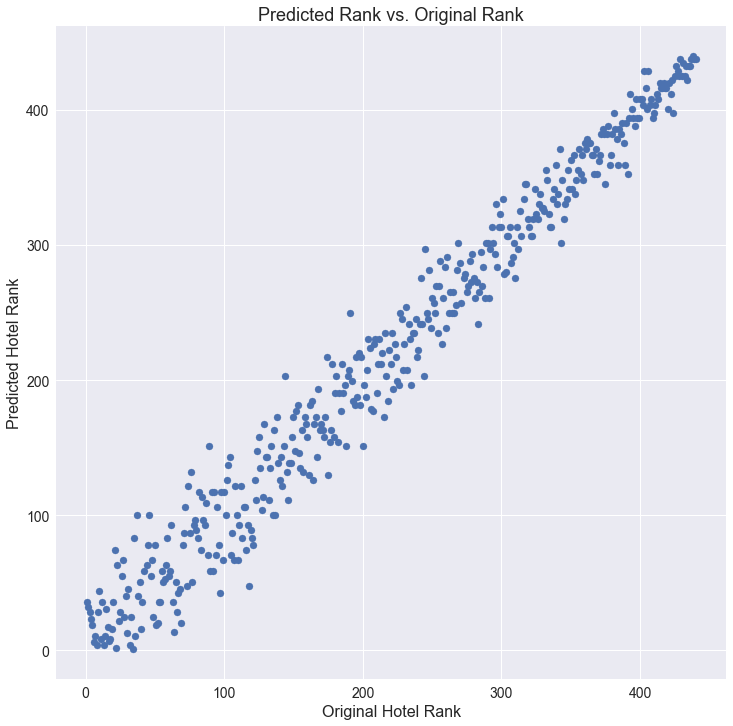

In [195]:
plt.figure(figsize = (12,12))
plt.scatter(ranked_higher_df_test.orig_rank, ranked_higher_df_test.pred_rank)
plt.title("Predicted Rank vs. Original Rank", fontsize=18)
plt.ylabel("Predicted Hotel Rank", fontsize=16)
plt.xlabel("Original Hotel Rank", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.xlim(0,20000)
#plt.ylim(0,500)
plt.show()

#### SGD Classifier

In [81]:
# search for best model with SGDClassifier
# logistic regression ridge or lasso penalties (not doing elastic net
# for the sake of my computer).
sgd_params = {
    'loss':['log'],
    'penalty':['l1','l2'],
    'alpha':np.logspace(-5, 1, 100)
}

sgd_gs_p = GridSearchCV(SGDClassifier(), sgd_params, cv=5, verbose=1)
sgd_gs_p.fit(X_train_p, Y_train_p)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:  5.4min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'loss': ['log'], 'alpha': array([  1.00000e-05,   1.14976e-05, ...,   8.69749e+00,   1.00000e+01])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [82]:
sgd_gs_p.best_score_

0.75958150460530383

In [83]:
sgd_predictions_p = sgd_gs_p.predict(X_test_p)

In [84]:
confusion_matrix(Y_test_p, sgd_predictions_p)

array([[12429,  3646],
       [ 4040, 11757]])

In [85]:
print "Test set accuracy: ", sgd_gs_p.score(X_test_p, Y_test_p)

Test set accuracy:  0.758847891566


In [86]:
conmat = np.array(confusion_matrix(Y_test_p, sgd_predictions_p, labels=[1,0]))
confusion = pd.DataFrame(conmat, index=['in_top_group', 'in_bottom_group'],
                            columns=['predicted_in_top','predicted_in_bottom'])
print(confusion)

                 predicted_in_top  predicted_in_bottom
in_top_group                11757                 4040
in_bottom_group              3646                12429


In [87]:
sgd_gs_p.best_estimator_

SGDClassifier(alpha=0.014174741629268049, average=False, class_weight=None,
       epsilon=0.1, eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False)

In [88]:
sgd_best_p = sgd_gs_p.best_estimator_

In [89]:
sgd_best_p.fit(X_train_p,Y_train_p)

SGDClassifier(alpha=0.014174741629268049, average=False, class_weight=None,
       epsilon=0.1, eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False)

In [90]:
sgd_best_p.score(X_train_p,Y_train_p)

0.76078691970080981

In [91]:
sgd_best_p.score(X_test_p,Y_test_p)

0.75887926706827313

In [92]:
Y_pred_train_sgd_p = sgd_best_p.predict(X_train_p)

In [93]:
confusion_matrix(Y_train_p, Y_pred_train_sgd_p)

array([[25619,  7394],
       [ 8085, 23610]])

In [204]:
Y_pred_prob_test_sgd_p = sgd_best_p.predict_proba(X_test_p)[:, 1]

In [205]:
Y_pred_prob_test_sgd_p.size

31872

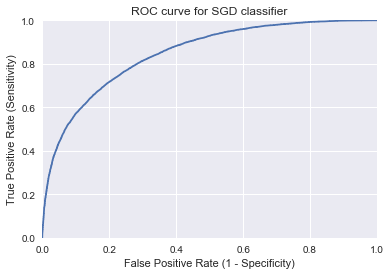

In [207]:
fpr, tpr, thresholds = roc_curve(Y_test_p, Y_pred_prob_test_sgd_p)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for SGD classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [218]:
Y_pred_test_sgd_p = sgd_best_p.predict(X_test_p)

In [219]:
print classification_report(Y_test_p, Y_pred_test_sgd_p)

             precision    recall  f1-score   support

          0       0.75      0.77      0.76     16075
          1       0.76      0.74      0.75     15797

avg / total       0.76      0.76      0.76     31872



In [94]:
sgd_best_p.coef_

array([[-0.18370023,  0.16953361,  0.22160499, -0.20003425,  0.18675765,
        -0.15400476,  0.29471479, -0.34972951, -0.0110148 , -0.12393023,
         0.00848949,  0.01629017,  0.16139849, -0.14809615,  0.19289748,
        -0.23104603,  0.08820781,  0.10570199,  0.29455663, -0.21888304,
        -0.09326251,  0.06916444,  0.14433307, -0.11211991, -0.04821758,
         0.06714232,  0.01385648,  0.06835461, -0.08325095,  0.04728677,
        -0.02656814,  0.05846571, -0.01394017,  0.00158897, -0.02462317,
        -0.04549578,  0.00419604, -0.02594678, -0.00049544, -0.01420953,
        -0.05214514, -0.0801224 , -0.02292645, -0.0508871 , -0.0152718 ,
         0.0548411 ,  0.04128947, -0.03602415, -0.00518906,  0.01385187,
         0.06741552, -0.06877825,  0.11450022, -0.00874399,  0.04742213,
        -0.05296651, -0.09282818,  0.00475862,  0.06731617,  0.03477512,
         0.0571808 , -0.06317751, -0.12880325,  0.07746133,  0.04360761,
        -0.04634692, -0.08073589,  0.10781535,  0.0

In [95]:
# make the coefs dataframe
coefs = pd.DataFrame({
        'coef':sgd_best_p.coef_[0],
        'predictor':X_train_p.columns
    })

In [96]:
# print out the coefs sorted by largest absolute value first
coefs['abscoef'] = np.abs(coefs.coef)
coefs.sort_values('abscoef', ascending=False, inplace=True)
#coefs.drop('abscoef', inplace=True, axis=1)
coefs[coefs.coef != 0]
#coefs

,coef,predictor,abscoef
7,-0.349730,amen_wifi_2,0.349730
105,-0.327636,hclass_num_5.0_2,0.327636
6,0.294715,amen_wifi_1,0.294715
18,0.294557,amen_breakfast_1,0.294557
94,-0.289526,hclass_num_2.5_1,0.289526
97,0.267970,hclass_num_3.0_2,0.267970
102,0.231656,hclass_num_4.5_1,0.231656
15,-0.231046,amen_gym_2,0.231046
104,0.224804,hclass_num_5.0_1,0.224804
103,-0.224667,hclass_num_4.5_2,0.224667


#### RANDOM FOREST CLASSIFIER

In [97]:
rfc = RandomForestClassifier()

In [98]:
#Random Forest Classifier with Grid Search
rfc_params = {'max_depth': [None, 4, 8, 12],
              'min_samples_split': [2,6,10],
             'max_leaf_nodes': [None, 4, 8, 12]}

rf_gs_p = GridSearchCV(rfc, rfc_params, cv=5, verbose=1)
rf_gs_p.fit(X_train_p, Y_train_p)
#rf_gs.fit(Xn_df,y)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:  2.8min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'min_samples_split': [2, 6, 10], 'max_leaf_nodes': [None, 4, 8, 12], 'max_depth': [None, 4, 8, 12]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [99]:
rf_gs_p.best_score_

0.89744699264387706

In [100]:
rfc_predictions_p = rf_gs_p.predict(X_test_p)

In [101]:
confusion_matrix(Y_test_p, rfc_predictions_p)

array([[14544,  1531],
       [ 1602, 14195]])

In [102]:
print "Test set accuracy: ", rf_gs_p.score(X_test_p, Y_test_p)

Test set accuracy:  0.901700552209


In [103]:
conmat = np.array(confusion_matrix(Y_test_p, rfc_predictions_p, labels=[1,0]))
confusion = pd.DataFrame(conmat, index=['in_top_group', 'in_bottom_group'],
                            columns=['predicted_in_top','predicted_in_bottom'])
print(confusion)

                 predicted_in_top  predicted_in_bottom
in_top_group                14195                 1602
in_bottom_group              1531                14544


In [104]:
rf_best_p = rf_gs_p.best_estimator_

In [105]:
rf_gs_p.best_params_

{'max_depth': None, 'max_leaf_nodes': None, 'min_samples_split': 6}

In [106]:
rf_best_p.fit(X_train_p, Y_train_p)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=6, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [107]:
rf_best_p.score(X_train_p,Y_train_p)

0.97437720220065527

In [108]:
rf_best_p.score(X_test_p, Y_test_p)

0.90097891566265065

In [109]:
Y_pred_train_rf_p = rf_best_p.predict(X_train_p)

In [110]:
confusion_matrix(Y_train_p, Y_pred_train_rf_p)

array([[32240,   773],
       [  885, 30810]])

In [111]:
Y_pred_test_rf_p = rf_best_p.predict(X_test_p)

In [112]:
confusion_matrix(Y_test_p, Y_pred_test_rf_p)

array([[14574,  1501],
       [ 1655, 14142]])

In [220]:
print classification_report(Y_test_p, Y_pred_test_rf_p)

             precision    recall  f1-score   support

          0       0.90      0.91      0.90     16075
          1       0.90      0.90      0.90     15797

avg / total       0.90      0.90      0.90     31872



In [209]:
Y_pred_prob_test_rf_p = rf_best_p.predict_proba(X_test_p)[:, 1]

In [210]:
Y_pred_prob_test_rf_p.size

31872

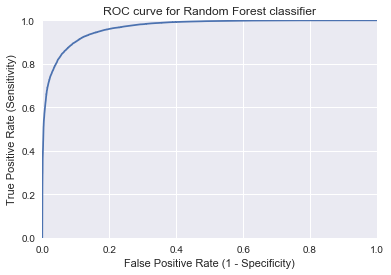

In [211]:
fpr, tpr, thresholds = roc_curve(Y_test_p, Y_pred_prob_test_rf_p)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Random Forest classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

['prange_low_2', 'prange_low_1', 'prange_high_1', 'prange_high_2', 'rooms_num_2', 'rooms_num_1', 'amen_bar_lounge_2', 'amen_gym_2', 'amen_gym_1', 'amen_wifi_2', 'amen_wifi_1', 'amen_bar_lounge_1', 'amen_room_service_2', 'amen_room_service_1', 'amen_breakfast_1']


(array([ 0.  ,  0.02,  0.04,  0.06,  0.08,  0.1 ,  0.12,  0.14,  0.16,  0.18]),
 <a list of 10 Text yticklabel objects>)

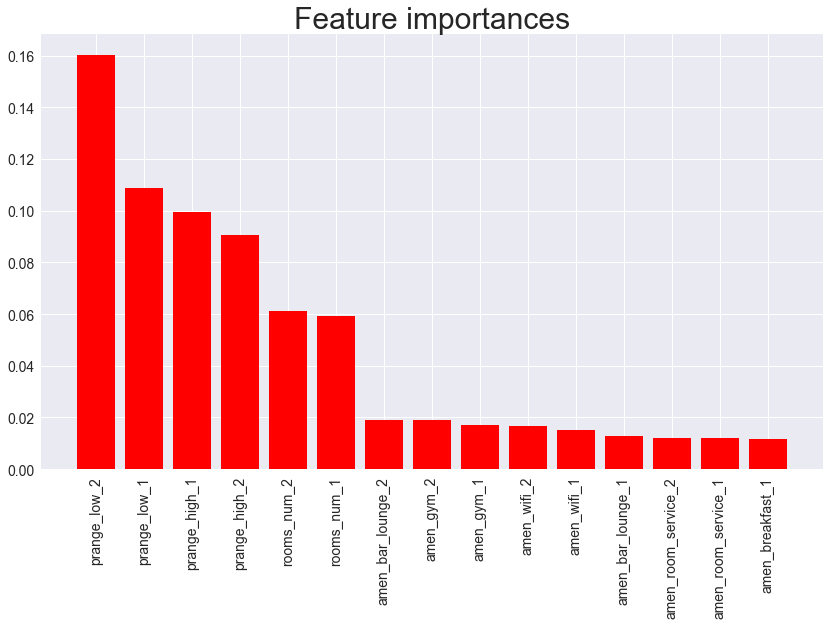

In [113]:
#feature importance plot
importances = rf_best_p.feature_importances_

feature_importances = zip(importances, X_train_p.columns)
sorted_feature_importances = sorted(feature_importances, reverse = True)
top_15_predictors = sorted_feature_importances[0:15]

values = [value for value, predictors in top_15_predictors]
predictors = [predictors for value, predictors in top_15_predictors]
print predictors

# Plot the feature importances of the forest
plt.figure(figsize = (14,8))
plt.title("Feature importances", fontsize= 30)
plt.bar(range(len(predictors)), values,color="r", align="center");
plt.xticks(range(len(predictors)), predictors, rotation=90, fontsize=14);
plt.yticks(fontsize=14)

#### LOGISTIC REGRESSION

In [115]:
#Logistic Regression with Grid Search
lr_params = {
    'solver':['liblinear'],
    #'C':np.logspace(-4, -1, 150),
    'C':np.linspace(0.0001, 1000, 100),
    'penalty':['l1','l2']
}

lr_gs_p = GridSearchCV(LogisticRegression(), lr_params, cv=5, verbose=1)
lr_gs_p.fit(X_train_p, Y_train_p)
#lr_gs.fit(Xn_df, y)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed: 23.1min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'C': array([  1.00000e-04,   1.01011e+01, ...,   9.89899e+02,   1.00000e+03]), 'solver': ['liblinear']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [116]:
# best parameters
lr_gs_p.best_params_

{'C': 343.43440909090907, 'penalty': 'l1', 'solver': 'liblinear'}

In [117]:
# best score in gridsearch as well as baseline score:
print lr_gs_p.best_score_
#print 1. - np.mean(Y_train)
print 1. - np.mean(y_pair)

0.760153304074
0.508262580244


In [118]:
#test data accuracy score
print "Test set accuracy: ", lr_gs_p.score(X_test_p, Y_test_p)

Test set accuracy:  0.761044176707


In [119]:
lr_best_p = lr_gs_p.best_estimator_

In [120]:
lr_best_p.fit(X_train_p,Y_train_p)

LogisticRegression(C=343.43440909090907, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [130]:
lr_best_p.score(X_train_p,Y_train_p)

0.76189961055819988

In [121]:
lr_best_p.coef_

array([[-0.22214196,  0.18608268,  0.19793482, -0.14829396,  0.19541288,
        -0.20077052,  0.37171126, -0.42186209, -0.05493109, -0.13149956,
        -0.02547245,  0.06638682,  0.19439344, -0.15010639,  0.1926837 ,
        -0.23559675,  0.10001734,  0.13944893,  0.35214422, -0.26226844,
        -0.13699377,  0.08986211,  0.21340237, -0.16728255, -0.00149849,
         0.02340003,  0.00701354,  0.07861426, -0.09616937,  0.06147744,
        -0.0269378 ,  0.08542713, -0.01631831,  0.01424349, -0.04363073,
        -0.0348555 ,  0.00868396, -0.02777459,  0.00260846, -0.01179021,
        -0.06174122, -0.08393364, -0.01538673, -0.04779571, -0.02496753,
         0.07003197,  0.03405511, -0.02444672, -0.00220872,  0.02332818,
         0.04852533, -0.06622887,  0.10994573, -0.00601774,  0.03081805,
        -0.04235571, -0.12944293,  0.01977449,  0.06727219,  0.0478326 ,
         0.06943106, -0.05765087, -0.15004986,  0.09584678,  0.05516628,
        -0.04918364, -0.08646182,  0.12904564, -0.0

In [122]:
#output confusion matrix on train data
Y_pred_train_lrgs_p = lr_best_p.predict(X_train_p)

In [123]:
confusion_matrix(Y_train_p, Y_pred_train_lrgs_p)

array([[25601,  7412],
       [ 7995, 23700]])

In [131]:
lr_best_p.score(X_test_p,Y_test_p)

0.76101280120481929

In [124]:
lr_predictions_p = lr_best_p.predict(X_test_p)

In [125]:
#test data confusion matrix
confusion_matrix(Y_test_p, lr_predictions_p)

array([[12441,  3634],
       [ 3983, 11814]])

In [126]:
conmat = np.array(confusion_matrix(Y_test_p, lr_predictions_p, labels=[1,0]))
confusion = pd.DataFrame(conmat, index=['in_top_group', 'in_bottom_group'],
                            columns=['predicted_in_top','predicted_in_bottom'])
print(confusion)

                 predicted_in_top  predicted_in_bottom
in_top_group                11814                 3983
in_bottom_group              3634                12441


In [221]:
print classification_report(Y_test_p, lr_predictions_p)

             precision    recall  f1-score   support

          0       0.76      0.77      0.77     16075
          1       0.76      0.75      0.76     15797

avg / total       0.76      0.76      0.76     31872



In [127]:
X_test_p.columns

Index([        u'rooms_num_1',         u'rooms_num_2',        u'prange_low_1',
              u'prange_low_2',       u'prange_high_1',       u'prange_high_2',
               u'amen_wifi_1',         u'amen_wifi_2', u'amen_room_service_1',
       u'amen_room_service_2',
       ...
          u'hclass_num_3.0_1',    u'hclass_num_3.0_2',    u'hclass_num_3.5_1',
          u'hclass_num_3.5_2',    u'hclass_num_4.0_1',    u'hclass_num_4.0_2',
          u'hclass_num_4.5_1',    u'hclass_num_4.5_2',    u'hclass_num_5.0_1',
          u'hclass_num_5.0_2'],
      dtype='object', length=106)

In [128]:
# make the coefs dataframe
coefs_p = pd.DataFrame({
        'coef':lr_best_p.coef_[0],
        'predictor':X_train_p.columns
    })

In [129]:
# print out the coefs sorted by largest absolute value first
coefs_p['abscoef'] = np.abs(coefs_p.coef)
coefs_p.sort_values('abscoef', ascending=False, inplace=True)
coefs_p.drop('abscoef', inplace=True, axis=1)
coefs_p[coefs_p.coef != 0]
#coefs

,coef,predictor
7,-0.421862,amen_wifi_2
97,0.419206,hclass_num_3.0_2
6,0.371711,amen_wifi_1
94,-0.359742,hclass_num_2.5_1
18,0.352144,amen_breakfast_1
105,-0.333023,hclass_num_5.0_2
93,0.303650,hclass_num_2.0_2
104,0.295190,hclass_num_5.0_1
96,-0.291874,hclass_num_3.0_1
102,0.290476,hclass_num_4.5_1


In [100]:
lr_preds_series = pd.Series(data=lr_predictions).rename("Pred_Val")

In [101]:
Y_test_w_preds = pd.concat([Y_test.reset_index(),lr_preds_series],axis=1).set_index('index')

In [103]:
pd.crosstab(Y_test_w_preds.top30, Y_test_w_preds.Pred_Val)

Pred_Val,0
top30,
0,82
1,6


In [106]:
lr_fns = Y_test_w_preds.merge(XY_df.drop('top30',axis=1),how='inner',left_index=True,right_index=True)

In [107]:
lr_fns.shape

(88, 57)

In [108]:
lr_fns[(lr_fns.top30 == 1) & (lr_fns.Pred_Val == 0)]

,top30,Pred_Val,hotel_name,rank_num,rooms_num,prange_low,prange_high,amen_wifi,amen_room_service,amen_restaurant,...,zip_5_10282,hclass_num_1.0,hclass_num_1.5,hclass_num_2.0,hclass_num_2.5,hclass_num_3.0,hclass_num_3.5,hclass_num_4.0,hclass_num_4.5,hclass_num_5.0
0,1,0,1 Hotel Central Park,30.0,229.0,383.0,749.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,1
27,1,0,Baccarat Hotel & Residences New York,17.0,114.0,763.0,1378.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,1
92,1,0,EVEN Hotel Times Square South,12.0,150.0,245.0,458.0,1.0,0.0,1.0,...,0,0,0,0,0,0,0,1,0,0
265,1,0,Park Hyatt New York,19.0,210.0,733.0,1433.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
323,1,0,The Beekman A Thompson Hotel,5.0,287.0,339.0,611.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,1
384,1,0,The Pierre A Taj Hotel New York,14.0,189.0,475.0,887.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,1
